## フォントエラーが多発することがありますが、実行には問題ないので読み飛ばしてください。

In [1]:
from sklearn.preprocessing import scale
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer 
font = {'family' : 'Yu Mincho'}
plt.rc('font', **font)

In [2]:
X=pd.read_csv('Responses.csv',sep=',')
display(X.head())
#被験者番号を除くRemove the human subjects' names
X2=X.iloc[:,1:6]
X3=pd.DataFrame(scale(X2),columns=X2.columns.values)

N=len(X3)
display(X3.head())

,Human subjects,Q1,Q2,Q3,Q4,Q5
0,A,1,3,3,4,1
1,B,4,1,2,2,4
2,C,1,1,4,3,1
3,D,2,2,2,2,4
4,E,3,1,4,1,1


,Q1,Q2,Q3,Q4,Q5
0,-1.166667,0.500000,0.429198,1.497172,-1.179536
1,1.333333,-1.166667,-0.490511,-0.455661,1.032094
2,-1.166667,-1.166667,1.348907,0.520756,-1.179536
3,-0.333333,-0.333333,-0.490511,-0.455661,1.032094
4,0.500000,-1.166667,1.348907,-1.432078,-1.179536


In [3]:
#Correlation matrix.
df_corr = X2.corr()
display(df_corr)

,Q1,Q2,Q3,Q4,Q5
Q1,1.000000,0.305556,-0.418979,-0.097642,0.712636
Q2,0.305556,1.000000,-0.367884,0.499057,0.303075
Q3,-0.418979,-0.367884,1.000000,-0.043903,-0.578576
Q4,-0.097642,0.499057,-0.043903,1.000000,0.038391
Q5,0.712636,0.303075,-0.578576,0.038391,1.000000


In [4]:
#相関係数行列の固有値を調べる。
import numpy.linalg as LA
import scipy as sp
df_corr_b = sp.array(df_corr)

from scipy import linalg 
print(linalg.eigvals(df_corr_b))

[2.40211562+0.j 1.36264334+0.j 0.21971049+0.j 0.58024829+0.j
 0.43528227+0.j]


/var/folders/9w/3yz8r_755wj25rzzhbl7k03m0000gn/T/ipykernel_46203/3997970519.py:4: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  df_corr_b = sp.array(df_corr)


1より大きい固有値は2個のため、共通因子数2とする。

In [5]:
fa = FactorAnalyzer(n_factors=2,rotation='promax',method='ml')
fa.fit(X3)

FactorAnalyzer(method='ml', n_factors=2, rotation_kwargs={})

In [6]:
eigen_org, eigen_cf = fa.get_eigenvalues()
ser_eigen_org = pd.Series(eigen_org)
ser_eigen_cf = pd.Series(eigen_cf)
print(ser_eigen_org)
print(ser_eigen_cf)

0    2.402116
1    1.362643
2    0.580248
3    0.435282
4    0.219710
dtype: float64
0    2.129608
1    0.979950
2    0.128675
3    0.006680
4   -0.125696
dtype: float64


findfont: Font family 'Yu Mincho' not found.
findfont: Font family 'Yu Mincho' not found.
findfont: Font family 'Yu Mincho' not found.
findfont: Font family 'Yu Mincho' not found.
findfont: Font family 'Yu Mincho' not found.
findfont: Font family 'Yu Mincho' not found.
findfont: Font family 'Yu Mincho' not found.
findfont: Font family 'Yu Mincho' not found.
findfont: Font family 'Yu Mincho' not found.
findfont: Font family 'Yu Mincho' not found.
findfont: Font family 'Yu Mincho' not found.
findfont: Font family 'Yu Mincho' not found.
findfont: Font family 'Yu Mincho' not found.
findfont: Font family 'Yu Mincho' not found.
findfont: Font family 'Yu Mincho' not found.
findfont: Font family 'Yu Mincho' not found.
findfont: Font family 'Yu Mincho' not found.
findfont: Font family 'Yu Mincho' not found.
findfont: Font family 'Yu Mincho' not found.
findfont: Font family 'Yu Mincho' not found.
findfont: Font family 'Yu Mincho' not found.
findfont: Font family 'Yu Mincho' not found.
findfont: 

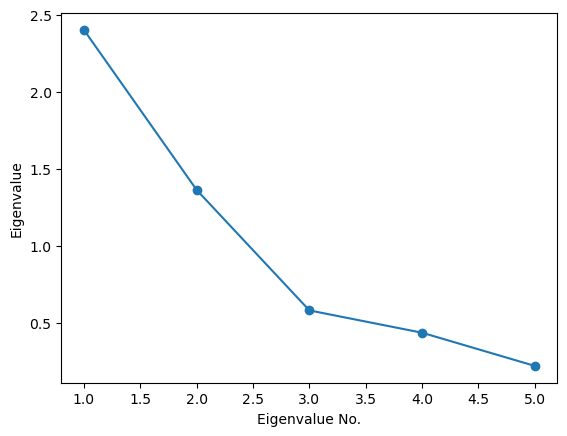

In [7]:
#スクリープロットも念のため描画します。既に計算した固有値の分布と一致。
x = np.array(range(len(ser_eigen_org)))+1
plt.plot(x, ser_eigen_org, marker='o')
plt.xlabel('Eigenvalue No.')
plt.ylabel('Eigenvalue')
plt.show()

In [8]:
#因子負荷量。Factor loadings
loadings = fa.loadings_
df_loadings = pd.DataFrame(loadings, index=X3.columns,
                           columns=['Factor1','Factor2'])
display(df_loadings) #因子負荷量行列：Loading matrix

,Factor1,Factor2
Q1,0.759347,-0.026778
Q2,0.162503,0.937870
Q3,-0.587813,-0.112795
Q4,-0.082231,0.542689
Q5,0.980012,-0.126264


# 因子得点 Factor scores

In [9]:
#因子得点。factor scores.
scores = fa.transform(X3)
df_scores = pd.DataFrame(scores, columns=['Factor1','Factor2'])
print(df_scores.shape)
display(df_scores.head())

(15, 2)


,Factor1,Factor2
0,0.711675,-1.037176
1,-1.377152,0.833534
2,-1.005986,-1.330013
3,-0.481471,0.741192
4,-1.055283,-1.080977


# Uniquenesses (独自因子の割合)

In [10]:
#独自因子。uniqueness.
uniqueness = fa.get_uniquenesses()
ser_uniqueness = pd.Series(uniqueness, index=X3.columns)
print(ser_uniqueness)

Q1    0.422675
Q2    0.093993
Q3    0.641754
Q4    0.698727
Q5    0.023635
dtype: float64


In [11]:
#Cell_10.
#寄与率.このモデルでどの程度まで説明できているか。
fa_var = fa.get_factor_variance()
df_fa_var = pd.DataFrame(fa_var,
                         index=['var', 'prop_var', 'cum_var'],
                         columns=['Factor1', 'Factor2'])
display(df_fa_var)

,Factor1,Factor2
var,1.915723,1.203493
prop_var,0.383145,0.240699
cum_var,0.383145,0.623843


In [12]:
#Cell_11.
def biplot_fa(score_2d, loadings, load_labels=None):
    plt.figure(figsize=(10,10))
    r1 = 1
    r2 = 1
    if load_labels is None:
        load_labels = range(len(loadings))
    for i, coef in enumerate(loadings):
        plt.arrow(0, 0, coef[0]*r1, coef[1]*r1, color='r')    
        plt.text(coef[0]*r1*r2, coef[1]*r1*r2, load_labels[i],
                 color='b', fontsize=20)
    for i in range(len(score_2d)):
        m = '${}$'.format(i)
        plt.scatter(score_2d[i,0], score_2d[i,1], marker=m, s=500, c='k')
    plt.xlabel('F_1')
    plt.ylabel('F_2')
    plt.grid()
    return None

findfont: Font family ['Yu Mincho'] not found. Falling back to DejaVu Sans.
findfont: Font family 'Yu Mincho' not found.
findfont: Font family 'Yu Mincho' not found.
findfont: Font family 'Yu Mincho' not found.
findfont: Font family 'Yu Mincho' not found.
findfont: Font family 'Yu Mincho' not found.
findfont: Font family 'Yu Mincho' not found.
findfont: Font family 'Yu Mincho' not found.
findfont: Font family 'Yu Mincho' not found.
findfont: Font family 'Yu Mincho' not found.
findfont: Font family 'Yu Mincho' not found.
findfont: Font family 'Yu Mincho' not found.
findfont: Font family 'Yu Mincho' not found.
findfont: Font family 'Yu Mincho' not found.
findfont: Font family 'Yu Mincho' not found.
findfont: Font family 'Yu Mincho' not found.
findfont: Font family 'Yu Mincho' not found.
findfont: Font family 'Yu Mincho' not found.
findfont: Font family 'Yu Mincho' not found.
findfont: Font family 'Yu Mincho' not found.
findfont: Font family 'Yu Mincho' not found.
findfont: Font family 'Y

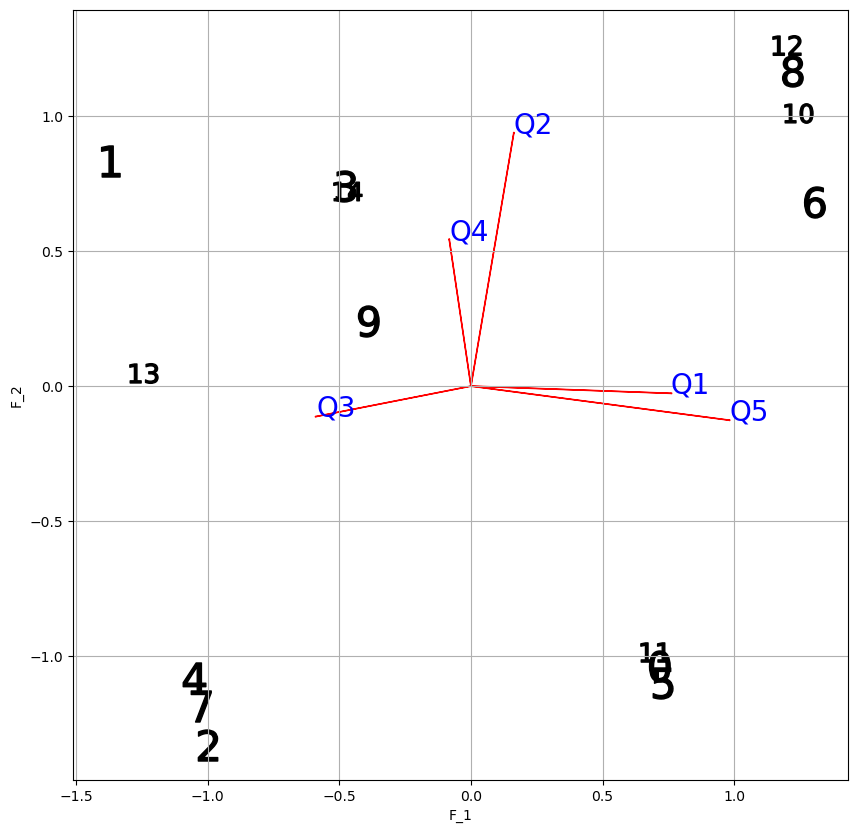

In [13]:
#Cell_12.
#バイプロット。biplot.
biplot_fa(scores, loadings, load_labels=X3.columns)